In [9]:
import sys
from sys import platform
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.ticker import ScalarFormatter
from matplotlib.gridspec import GridSpec
import copy
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

import numpy as np
import seaborn as sns
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.integrate import quad
from IPython.display import display, Math
from tqdm import tqdm

import pickle

from astropy.io import fits, ascii
from astropy.table import Table
from astropy.modeling import functional_models, fitting
from astropy.timeseries import LombScargle

import stingray.events as ev
import stingray.lightcurve as lc
from stingray import io
import stingray.powerspectrum as powspec 
import stingray.crossspectrum as crossspec
from stingray.pulse.search import phaseogram, plot_phaseogram, plot_profile, epoch_folding_search, z_n_search
from stingray.pulse.pulsar import fold_events, pulse_phase
import stingray.gti as sting_gti
import stingray.pulse.accelsearch as accelsearch
from stingray import stats
from stingray.deadtime import fad


sns.set_context('paper')
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.set_style({'axes.edgecolor': 'black', 'xtick.bottom': True, 'ytick.left': True,})
sns.set_palette("colorblind")

sys.path.insert(1, '/Users/sean/scripts/helpers')

from stingray_plus import *

root_dir = '/Users/sean/astro/MAXI_J0655m013/'

plot_dir = root_dir + 'figures/'

# OBS1

In [18]:
OBSID='80801347002'

84.39886569976807 +/- 0.6778756319545346
83.53979587554932 +/- 0.9001480278555679
85.71591377258301 +/- 1.0461845313569464
89.9046540260315 +/- 4.083012242534853


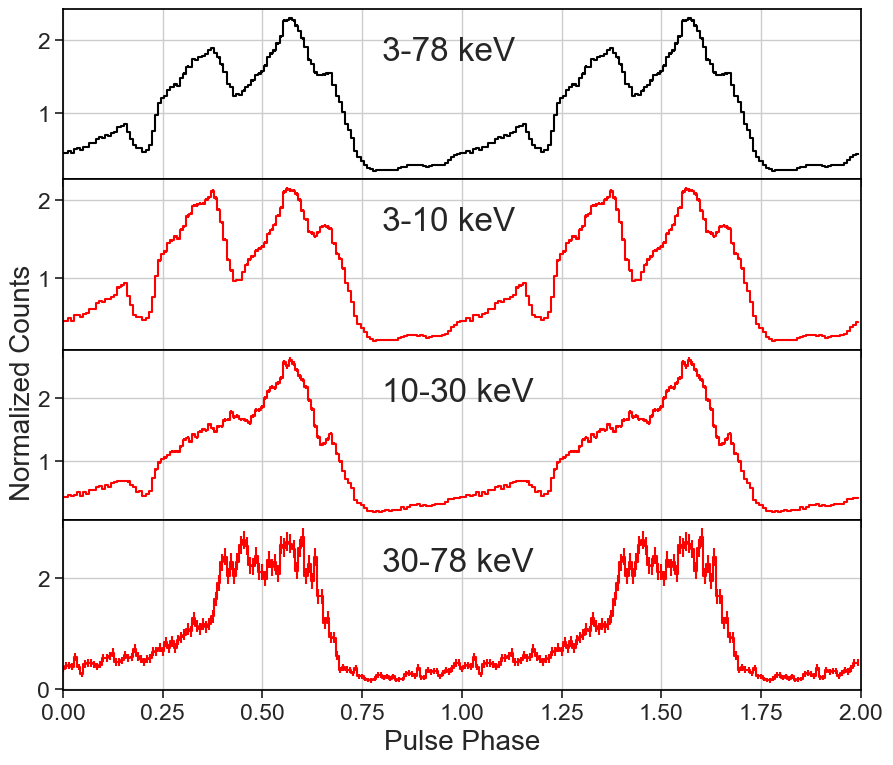

In [19]:
energy_bins = [[3,78], [3,10], [10,30], [30,78]]

fig, axes = plt.subplots(len(energy_bins), 1, figsize = (9, 2*len(energy_bins)), gridspec_kw={'hspace':0}, sharex=True)

for i in range(len(energy_bins)):
    e=energy_bins[i]
    profile_data = fits.open(root_dir + OBSID + '_products06_' + str(e[0]) + 'to' + str(e[1]) +\
                             '/pulse_profile_' + str(e[0]) + 'to' + str(e[1]) + '.fits')[1]
    color='red'
    if i==0:
        color='black'
    
    phase_bins = profile_data.data['PHASE']
    profile = profile_data.data['SUM12']
    profile_err = profile_data.data['SUM_E']
    axes[i].errorbar(np.concatenate([phase_bins, phase_bins+1]), np.concatenate([profile,profile])/np.mean(profile), yerr=np.concatenate([profile_err, profile_err])/np.mean(profile), fmt='', ls='', color=color)
    axes[i].step(np.concatenate([phase_bins, phase_bins+1]), np.concatenate([profile,profile])/np.mean(profile), where='mid', color=color)
    axes[i].text(0.4, 0.7, str(e[0]) + '-' + str(e[1]) + ' keV', transform=axes[i].transAxes, fontsize=24)
    
    print(str(PF(profile)*100) + ' +/- ' + str(1.645*PF_err(profile, profile_err)*100))

fig.text(0.0, 0.5, 'Normalized Counts', va='center', rotation='vertical', fontsize=20)
axes[-1].set_xlabel('Pulse Phase', fontsize=20)
axes[-1].set_xlim(0.,2.)
plt.tight_layout()
plt.savefig(plot_dir + OBSID + '_pulseprofile_4harm_Esplit_lccorr.pdf')

# OBS2

In [15]:
OBSID='90801321001'

62.74106502532959 +/- 5.967355488047768
65.2250349521637 +/- 6.079449016159796
65.06286859512329 +/- 12.638440999820633
78.41777205467224 +/- 23.609176583038547


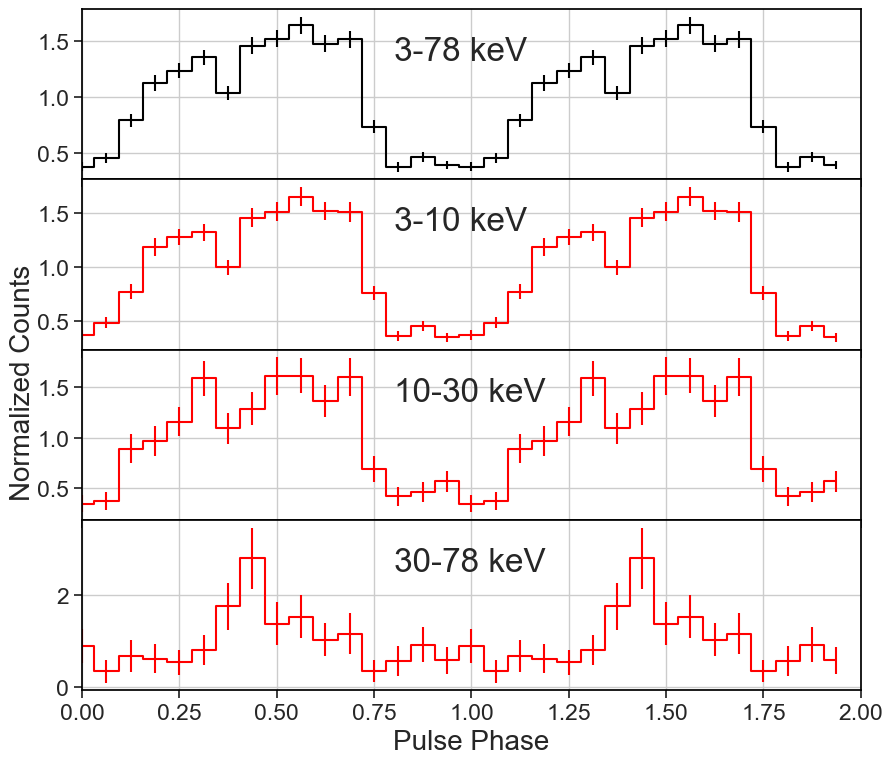

In [17]:
energy_bins = [[3,78], [3,10], [10,30], [30,78]]

fig, axes = plt.subplots(len(energy_bins), 1, figsize = (9, 2*len(energy_bins)), gridspec_kw={'hspace':0}, sharex=True)

for i in range(len(energy_bins)):
    e=energy_bins[i]
    profile_data = fits.open(root_dir + OBSID + '_products_' + str(e[0]) + 'to' + str(e[1]) +\
                             '/pulse_profile_' + str(e[0]) + 'to' + str(e[1]) + '.fits')[1]
    color='red'
    if i==0:
        color='black'
    
    phase_bins = profile_data.data['PHASE']
    profile = np.roll(profile_data.data['SUM12'], 7)
    profile_err = np.roll(profile_data.data['SUM_E'], 7)
    axes[i].errorbar(np.concatenate([phase_bins, phase_bins+1]), np.concatenate([profile,profile])/np.mean(profile), yerr=np.concatenate([profile_err, profile_err])/np.mean(profile), fmt='', ls='', color=color)
    axes[i].step(np.concatenate([phase_bins, phase_bins+1]), np.concatenate([profile,profile])/np.mean(profile), where='mid', color=color)
    axes[i].text(0.4, 0.7, str(e[0]) + '-' + str(e[1]) + ' keV', transform=axes[i].transAxes, fontsize=24)
    
    print(str(PF(profile)*100) + ' +/- ' + str(1.645*PF_err(profile, profile_err)*100))

fig.text(0.0, 0.5, 'Normalized Counts', va='center', rotation='vertical', fontsize=20)
axes[-1].set_xlabel('Pulse Phase', fontsize=20)
axes[-1].set_xlim(0.,2.)
plt.tight_layout()
plt.savefig(plot_dir + OBSID + '_pulseprofile_4harm_Esplit_lccorr.pdf')

# 